## Convergence behavior of the sparse GPR regressor

The modelled function and its derivative were both evaluated at random datapoints and the MSE was then plotted for different numbers of function and derivative evaluations. Additionally, the procedure was done with different optimizers for the kernel parameters (`L-BFGS-B`, `SLSQP`).

In [19]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jaxgp.tests import testfunctions, optimizertesting

In [20]:
optimizers = ["L-BFGS-B", "SLSQP"]#, "TNC"
fun = lambda x: testfunctions.himmelblau(x)/800.0
num_gridpoints = jnp.array([100,100])
ran = (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0]))

in_dir = "./data_files/different_number_of_datapoints/non-ext"

# f_vals = [1, 5, 20, 50]
f_vals = [5, 20, 50]
d_vals = [200, 400, 800, 1500]

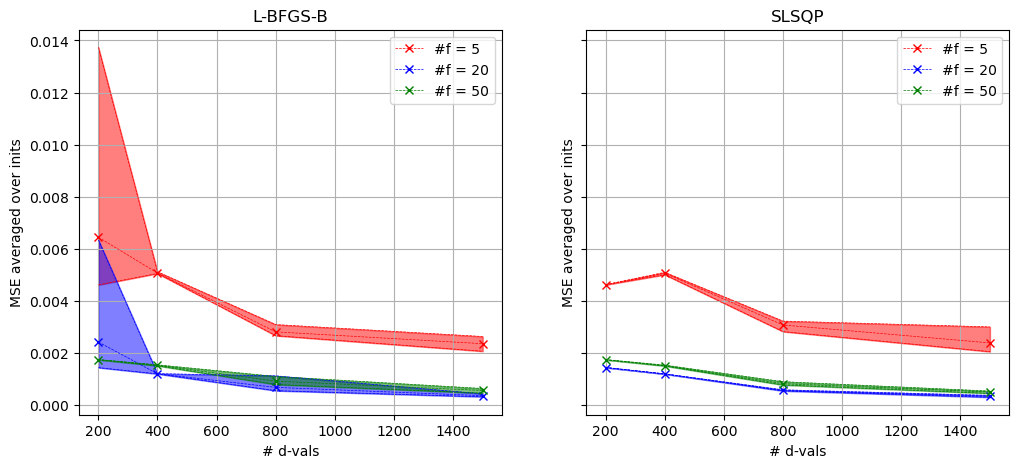

In [21]:
fig, ax = plt.subplots(1,len(optimizers),figsize=(12,5),sharey=True)

_, Y = optimizertesting.create_training_data_2D(0, num_gridpoints, ran, 0.0, fun)
Y = Y[:,0]

colors = ["r", "b", "g", "cyan"]

for i,optimizer in enumerate(optimizers):
    for color,num_f_vals in zip(colors,f_vals):
        avg = []
        mini = []
        maxi = []
        for num_d_vals in d_vals:
            means = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")

            avg_mse = 0
            min_mse = jnp.inf
            max_mse = -jnp.inf
            for iter, mean in enumerate(means.values()):
                mse = jnp.mean((Y-mean)**2)
                if mse < min_mse: min_mse = mse
                if mse > max_mse: max_mse = mse
                avg_mse += mse
            avg_mse /= iter + 1

            avg.append(avg_mse)
            mini.append(min_mse)
            maxi.append(max_mse)
        ax[i].plot(d_vals,avg,marker="x", lw=.5, ls="--",label=f"#f = {num_f_vals}", color=color)
        ax[i].plot(d_vals,mini, lw=.5, ls="--", color=color)
        ax[i].plot(d_vals,maxi, lw=.5, ls="--", color=color)
        ax[i].fill_between(d_vals, mini, maxi,alpha=0.5, color=color)
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("# d-vals")
    ax[i].set_ylabel("MSE averaged over inits")
    ax[i].set_title(optimizer)
    # ax[i].set_ylim(0,0.1)

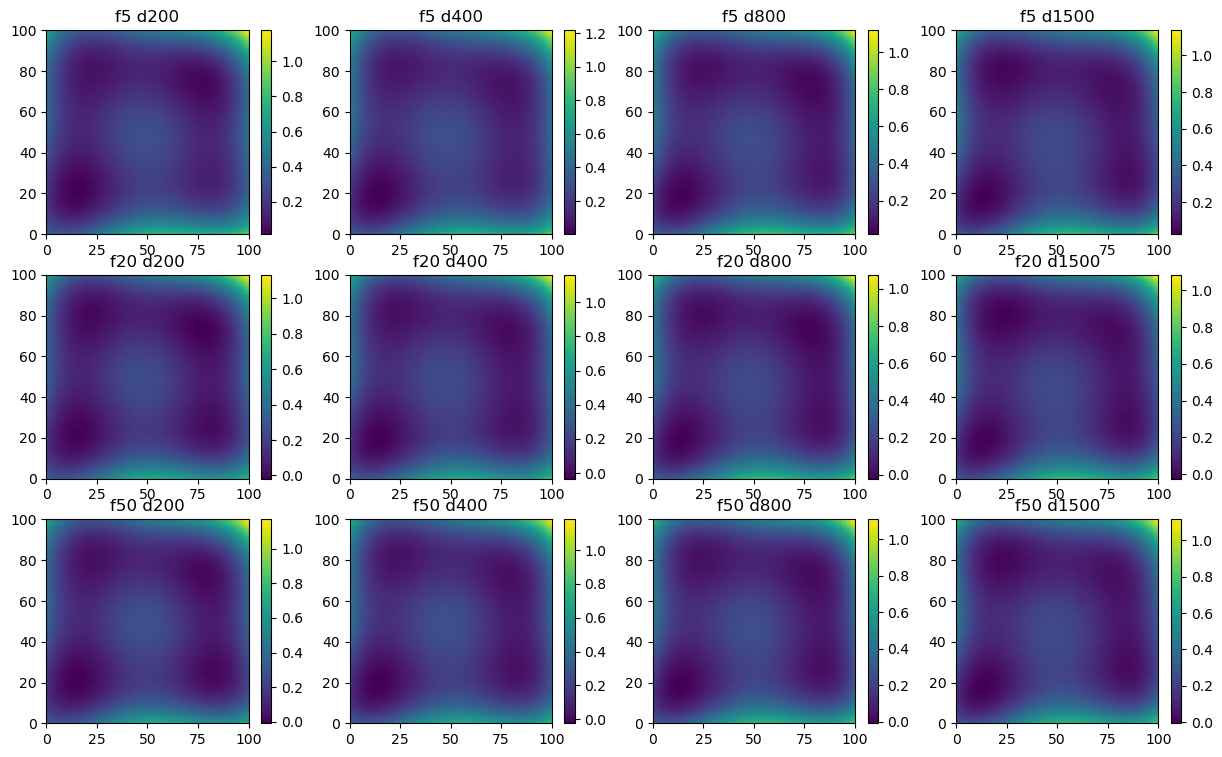

In [22]:
# f_vals = [1, 5, 20, 50]
# d_vals = [200, 400, 800, 1500]
optimizer = "L-BFGS-B"
# optimizer = "SLSQP"

fig, ax = plt.subplots(len(f_vals),len(d_vals), figsize=(15,9))

for i,num_f_vals in enumerate(f_vals):
    for j,num_d_vals in enumerate(d_vals):
        means = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
        mean = means["arr_0"]
        
        ax[i,j].set_title(f"f{num_f_vals} d{num_d_vals}")
        im = ax[i,j].pcolormesh(mean.reshape(100,100))
        fig.colorbar(im, ax=ax[i,j])

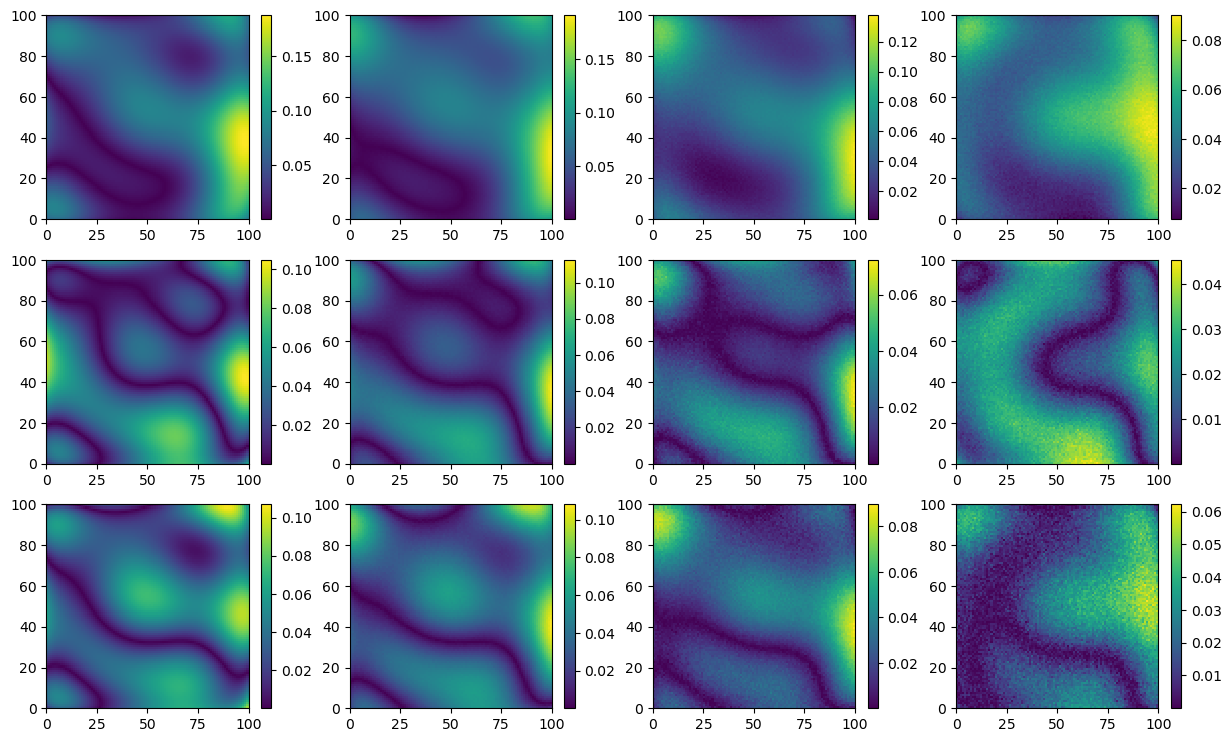

In [23]:
# f_vals = [1, 5, 20, 50]
# d_vals = [200, 400, 800, 1500]
optimizer = "L-BFGS-B"
# optimizer = "SLSQP"

_, Y_test = optimizertesting.create_training_data_2D(0, num_gridpoints, ran, 0.0, fun)
Y_test = Y_test[:,0]

fig, ax = plt.subplots(len(f_vals),len(d_vals), figsize=(15,9))

for i,num_f_vals in enumerate(f_vals):
    for j,num_d_vals in enumerate(d_vals):
        means = jnp.load(f"{in_dir}/him_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
        mean = means["arr_0"]
        
        im = ax[i,j].pcolormesh(jnp.abs(mean-Y_test).reshape(100,100))
        fig.colorbar(im, ax=ax[i,j])